## Importing Packages

In [1]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from copy import deepcopy
import time
%matplotlib notebook

## Load Dataset

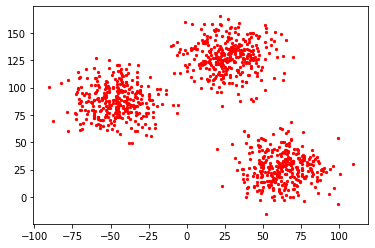

In [2]:
# In this experiment we will work with synthetic 2D datasets. 
# make_blobs method creates synthetic data points forming clusters.
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0, cluster_std=0.5)
X = X * 30
y = y * 30
plt.scatter(X[:,0], X[:,1] , c='red', s=5)
plt.show()

Let us write a function to calculate Euclidean Distance between two vectors

In [3]:
#Defining distance function to calculate Euclidean Distance between two vectors
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#### We will intialize three cluster centers randomly to start the k-means algorithm.

In [4]:
# Number of clusters
k = 3
# X coordinates of random centroids
cx = np.random.randint(np.min(X[:,0])+20, np.max(X[:,0])-20, size=k)
# Y coordinates of random centroids
cy = np.random.randint(np.min(X[:,1])+20, np.max(X[:,1])-20, size=k)
C = np.array(list(zip(cx, cy)), dtype=np.float32)
print(C)

[[-29.  98.]
 [ 77.  20.]
 [ 67.  30.]]


##### This is how the data looks when the algorithm is initialized

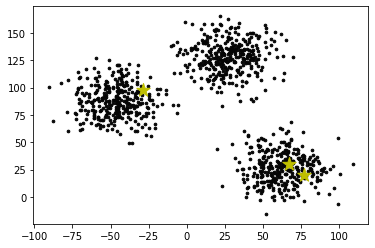

In [5]:
# Plotting along with the Centroids
plt.scatter(X[:,0], X[:,1], c='#050505', s=7)
plt.scatter(cx, cy, marker='*', s=200, c='y')
plt.show()

In [6]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
error

148.87242860919545

In [7]:
%matplotlib notebook
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
counter = 0

# Loop will run till the error becomes zero
while error >= 0.1:
    print("Step: ", counter)
    counter += 1
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each data point to its closest cluster # Expectation
    for i in range(len(X)):
        # Task 1:
        # distances = calculate_distance(data_point_i and clusters)
        distances = dist(X[i] , C)
        distances
        # cluster = the index of the cluster that has minimum distance
        cluster = np.argmin(distances)
        # The datapoint i belongs to the above determined cluster
        clusters[i] = cluster
        
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    # Finding the new centroids by taking the average value # Maximization
    for i in range(k):
        # Task 2:
        # points = list of data points that belong to the cluster i
        points = []
        for j in range(len(X)):
            if clusters[j] == i:
                points.append(X[j])

        # C[i] = mean of  the points
        C[i] = np.mean(points , axis=0)
        
        
    
    # Calculating the distance between the old and new centroids.
    error = dist(C, C_old, None)
    ax.clear()
    
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='y')
    
    fig.canvas.draw()
    time.sleep(5)
    print("Error Difference: ",error)

<IPython.core.display.Javascript object>

Step:  0
Error Difference:  24.204142
Step:  1
Error Difference:  3.321101
Step:  2
Error Difference:  1.5016694
Step:  3
Error Difference:  0.94499236
Step:  4
Error Difference:  0.89340055
Step:  5
Error Difference:  0.854139
Step:  6
Error Difference:  0.6744766
Step:  7
Error Difference:  0.9168521
Step:  8
Error Difference:  0.7134971
Step:  9
Error Difference:  1.3215679
Step:  10
Error Difference:  2.1916718
Step:  11
Error Difference:  1.5700366
Step:  12
Error Difference:  0.7702023
Step:  13
Error Difference:  1.13059
Step:  14
Error Difference:  1.2452061
Step:  15
Error Difference:  2.5009975
Step:  16
Error Difference:  2.2041545
Step:  17
Error Difference:  1.104597
Step:  18
Error Difference:  1.3529534
Step:  19
Error Difference:  2.4634674
Step:  20
Error Difference:  1.0307521
Step:  21
Error Difference:  0.4247023
Step:  22
Error Difference:  1.1691052
Step:  23
Error Difference:  0.76770425
Step:  24
Error Difference:  1.3611561
Step:  25
Error Difference:  1.792448

In [8]:
#Defining distance function to calculate Euclidean Distance between two vectors
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [12]:
# Task 3 Vary the number of clusters in make_blobs method and visualize the results.
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0, cluster_std=0.5)
X = X * 30
y = y * 30
plt.scatter(X[:,0], X[:,1] , c='red', s=5)
plt.show()

In [13]:
# Task 3 Vary the number of cluster assumption k different from the clusters present and visualize the results
# Number of clusters
k = 4
# X coordinates of random centroids
cx = np.random.randint(np.min(X[:,0])+20, np.max(X[:,0])-20, size=k)
# Y coordinates of random centroids
cy = np.random.randint(np.min(X[:,1])+20, np.max(X[:,1])-20, size=k)
C = np.array(list(zip(cx, cy)), dtype=np.float32)
print(C)

[[  0.  74.]
 [ 43. 118.]
 [-30. 196.]
 [ 22.  47.]]


In [14]:
# Plotting along with the Centroids
plt.scatter(X[:,0], X[:,1], c='#050505', s=7)
plt.scatter(cx, cy, marker='*', s=200, c='y')
plt.show()

In [15]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
error

251.51143115174705

In [16]:
%matplotlib notebook
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
counter = 0

# Loop will run till the error becomes zero
while error >= 0.1:
    print("Step: ", counter)
    counter += 1
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each data point to its closest cluster # Expectation
    for i in range(len(X)):
        # Task 1:
        # distances = calculate_distance(data_point_i and clusters)
        distances = dist(X[i] , C)
        distances
        # cluster = the index of the cluster that has minimum distance
        cluster = np.argmin(distances)
        # The datapoint i belongs to the above determined cluster
        clusters[i] = cluster
        
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    # Finding the new centroids by taking the average value # Maximization
    for i in range(k):
        # Task 2:
        # points = list of data points that belong to the cluster i
        points = []
        for j in range(len(X)):
            if clusters[j] == i:
                points.append(X[j])

        # C[i] = mean of  the points
        C[i] = np.mean(points , axis=0)
        
        
    
    # Calculating the distance between the old and new centroids.
    error = dist(C, C_old, None)
    ax.clear()
    
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='y')
    
    fig.canvas.draw()
    time.sleep(5)
    print("Error Difference: ",error)

<IPython.core.display.Javascript object>

Step:  0
Error Difference:  76.61139
Step:  1
Error Difference:  1.6663191
Step:  2
Error Difference:  0.2636227
Step:  3
Error Difference:  0.0


### Elbow method to find the number of clusters in data points

In [17]:
%matplotlib notebook
# Run the Kmeans algorithm and get the index of data points clusters
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # Task 4: 
    # Add the sum of squared distance between data points and their assigned clusters’ centroids and append it to sse.
    # Find the inbuilt variable that does this.
    # hint: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    # sse.append(...)
    sse.append(km.inertia_)
    

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

<IPython.core.display.Javascript object>

The Number of clusters: 4